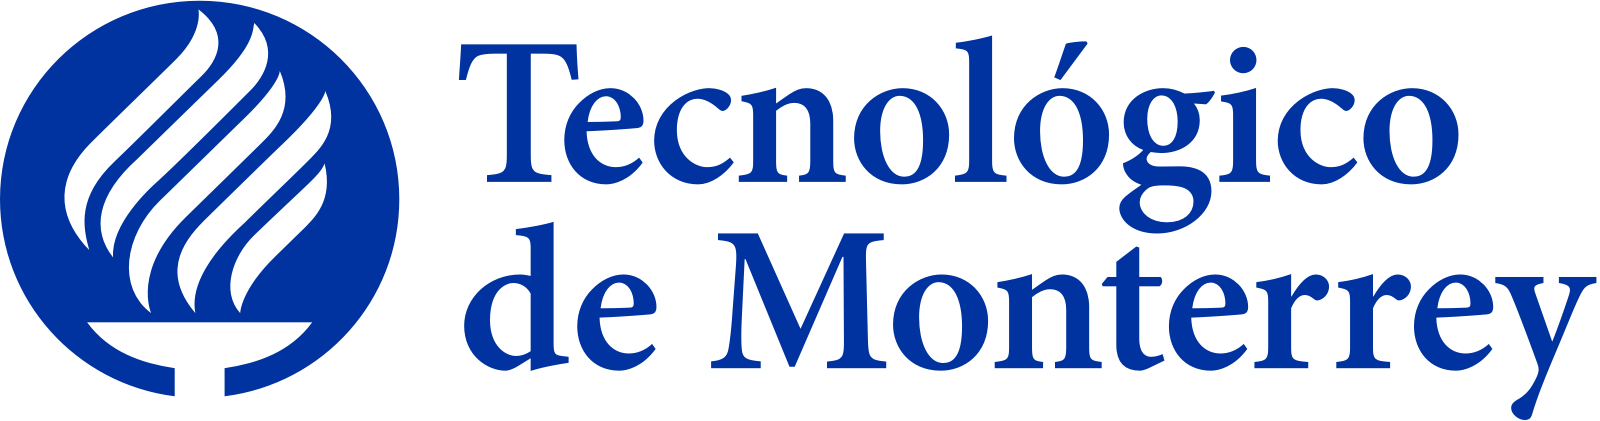

#**Maestría en Inteligencia Artificial Aplicada**

**Asignatura:** Ciencia y analítica de datos

**Profesor Titular:** Jobish Vallikavungal Devassia

**Tema:** Transformación y Reducción de datos

**Semana:** Semana Cuatro

**Estudiantes:** 
* Ulises Guadalupe Ortega Mena - Matrícula: A01793983
* Henry Junior Aranzales Lopez - Matrícula: A01794020

**Grupo:** Grupo 101 - Profesora Victoria Guerrero Orozco


#**Generalidades de la actividad**

## **Objetivo**

Realizar la reducción de características de un conjunto de datos para encontrar sus componentes principales y mejorar su interpretabilidad con la menor pérdida de información posible.

## **Instrucciones**

Para esta actividad use la siguiente base de datos:

* Enlace base: https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv

* Enlace descripción: https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt

Esta actividad se compone de 2 partes:

> **Parte 1: Ejercicio guiado** 

>>Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

>>Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

>>Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

>>Paso 2: Interprete cada componente principal en términos de las variables originales

>>Examine la magnitud y la dirección de los coeficientes de las variables originales.
>>Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

>>Paso 3: Identifique valores atípicos

>>Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

>**Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

>* ¿Cuál es el número de componentes mínimo y por qué?
>*¿Cuál es la variación de los datos que representan esos componentes?
>*¿Cuál es la pérdida de información después de realizar PCA?
>*De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
>*¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
 

>>Extensión: 200 palabras o más entre todas las respuestas. Sigue el formato pregunta-respuesta.

#**Descripción de la base de datos**

In [ ]:
Descripcion = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt"

## **Variables y Atributos**

La presente investigación, se centra en los pagos predeterminados de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos, en donde se empleó una variable binaria, pago por defecto (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas:

* X1: Monto del crédito otorgado (dólar NT): incluye tanto el crédito de consumo individual como su crédito familiar (complementario).

* X2: Género (1 = masculino; 2 = femenino).

* X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros)

* X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).

* X5: Edad (año).

* X6 - X11: Historial de pagos pasados. Hicimos un seguimiento de los registros de pagos mensuales pasados ​​(de abril a septiembre de 2005) de la siguiente manera:

>>X6 = el estado de pago en septiembre de 2005

>>X7 = el estado de pago en agosto de 2005

>>X8 = el estado de pago en julio de 2005

>>X9 = el estado de pago en junio de 2005

>>X10 = el estado de pago en mayo de 2005

>>X11 = estado de amortización en abril de 2005. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más.

* X12-X17: Importe del estado de cuenta (dólar NT).

>>X12 = monto del estado de cuenta en septiembre de 2005

>>X13 = monto del estado de cuenta en agosto de 2005

>>X17 = monto del estado de cuenta en abril de 2005

* X18-X23: Monto del pago anterior (dólar NT)

>>X18 = monto pagado en septiembre de 2005

>>X19 = monto pagado en agosto de 2005

>>X23 = monto pagado en abril de 2005


#**Parte 1 de la Actividad**

En primer lugar se deben importar de las librerias y recursos a utilizar de acuerdo con el material de la clase y el modulo

In [ ]:
# Librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

A continuación se debe importar la base de datos con la que se trabajará. 

In [ ]:
# Importe de la base de datos

DataActividad='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
DataActividad_df = pd.read_csv(DataActividad)
df = DataActividad_df.copy()
df.dropna(axis = 0, inplace=True)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


El método PCA requiere que los datos de entrada sean confiables, por lo que como parte del tratamiento de datos, se deben eliminar las variables que no aportan nada, además de las categóricas: 

In [ ]:
#Extraemos datos de categorización
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29958 non-null  int64  
 1   X1      29958 non-null  int64  
 2   X2      29958 non-null  float64
 3   X3      29958 non-null  float64
 4   X4      29958 non-null  float64
 5   X5      29958 non-null  float64
 6   X6      29958 non-null  float64
 7   X7      29958 non-null  float64
 8   X8      29958 non-null  float64
 9   X9      29958 non-null  float64
 10  X10     29958 non-null  float64
 11  X11     29958 non-null  float64
 12  X12     29958 non-null  float64
 13  X13     29958 non-null  float64
 14  X14     29958 non-null  float64
 15  X15     29958 non-null  float64
 16  X16     29958 non-null  float64
 17  X17     29958 non-null  float64
 18  X18     29958 non-null  float64
 19  X19     29958 non-null  float64
 20  X20     29958 non-null  float64
 21  X21     29958 non-null  float64
 22

In [ ]:
#Eliminación de columnas innecesarias

df.drop(['ID','X1','X2','X3','X4','X6','X7','X8','X9','X10','X11','Y'], axis=1, inplace=True)
df.head()

,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Para entender con mayor claridad la información que estamos analizando, asignaremos nombres alusivos a cada variable según la descripción de la base de datos: 

In [ ]:
df.rename(columns = {"X5" : "Edad", "X12": "Importe_SEP", "X13": "Importe_AGO", "X14": "Importe_JUL", "X15":"Importe_JUN",
                     "X16": "Importe_MAY", "X17":"Importe_ABR", "X18":"CantidadPag_SEP", "X19":"CantidadPag_AGO", "X20":"CantidadPag_JUL", 
                     "X21":"CantidadPag_JUN", "X22":"CantidadPag_MAY", "X23":"CantidadPag_ABR",}, inplace = True)
          
df

,Edad,Importe_SEP,Importe_AGO,Importe_JUL,Importe_JUN,Importe_MAY,Importe_ABR,CantidadPag_SEP,CantidadPag_AGO,CantidadPag_JUL,CantidadPag_JUN,CantidadPag_MAY,CantidadPag_ABR
0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


Como paso siguiente se realiza la correlación correspondiente y se procede con la graficación de los datos:

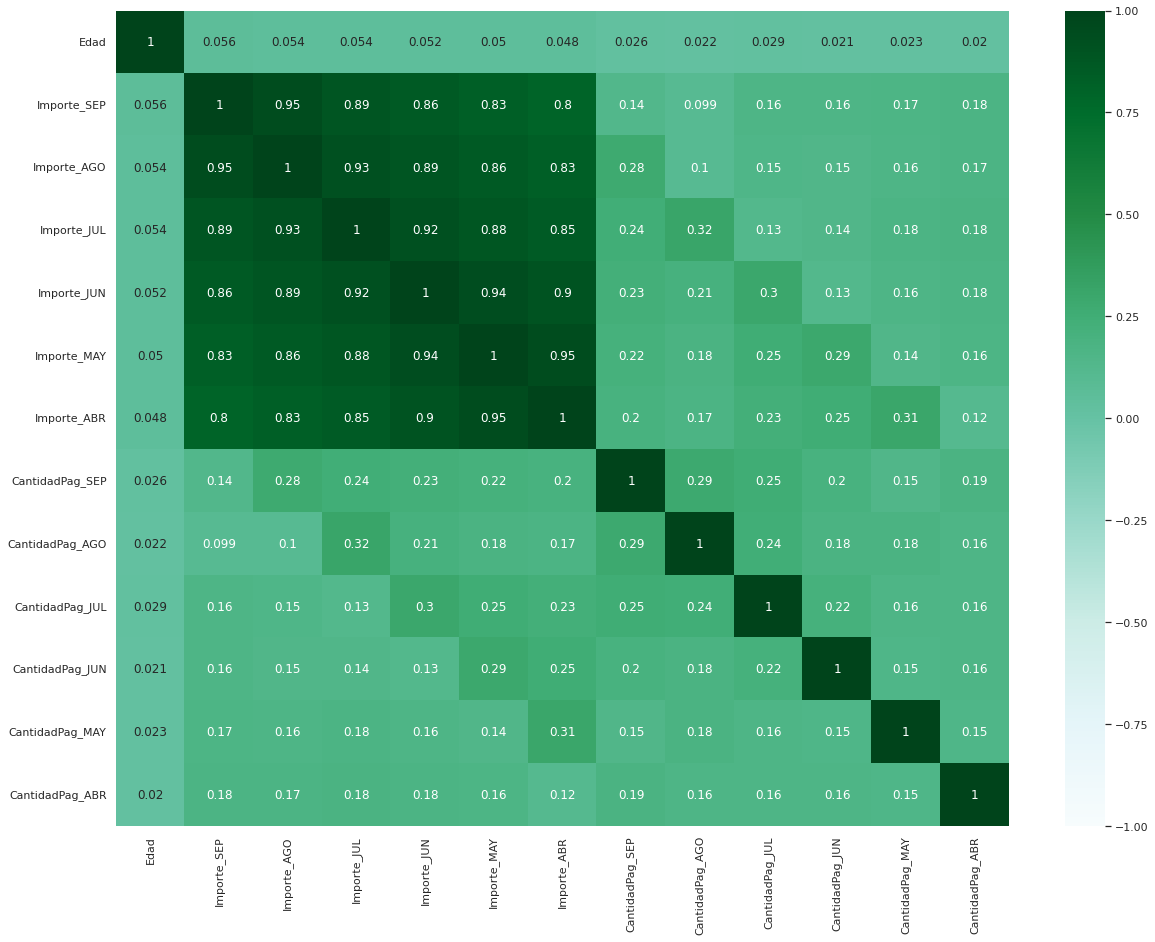

In [ ]:
# Matriz de correlación

MCorrelacion = df.corr()
sns.set(rc = {'figure.figsize':(20, 15)})
sns.heatmap(MCorrelacion, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

En la anterior matriz de correlación, se puede apreciar la dependencia entre múltiples variables al mismo tiempo. Muestra datos tabulares simétricos donde cada fila y columna representan una variable, y el valor correspondiente es el coeficiente de correlación que denota la fuerza de una relación entre estas dos variables. 

Las variables con valores de coeficiente de correlación más cercanos a 1 muestran una fuerte correlación positiva (Color verde Oscuro), los valores más cercanos a -1 muestran una fuerte correlación negativa (Color claro o blanco) y los valores más cercanos a 0 muestran una correlación débil o nula (Verde neutro). 

El método PCA utiliza las varianzas para determinar correlaciones y separar en componentes dicha información, por lo que veremos como son las varianzas de la información original.

In [ ]:
# Varianza por Columna
Varianza_Total = df.var().sum()

Varianza = {}
for column in df.columns:
  Varianza[column] = [((df[column].var()/Varianza_Total )*100)]
temp_df = pd.DataFrame(Varianza)
display(temp_df)
print('Varianza Total \t:',Varianza_Total)

,Edad,Importe_SEP,Importe_AGO,Importe_JUL,Importe_JUN,Importe_MAY,Importe_ABR,CantidadPag_SEP,CantidadPag_AGO,CantidadPag_JUL,CantidadPag_JUN,CantidadPag_MAY,CantidadPag_ABR
0,2.966748e-07,18.966795,17.719492,16.822421,14.476032,12.928136,12.405015,0.959263,1.857469,1.084513,0.85869,0.816425,1.105749


Varianza Total 	: 28618425918.705917


Como podemos ver, las varianzas son muy diferentes para cada tipo de dato. Por ello, si aplicamos PCA, tomaría algunas variables como más importantes cuando en realidad no lo son. Por ello, requerimos aplicar una transformación y tener los datos en el mismo rango.



In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,Edad,Importe_SEP,Importe_AGO,Importe_JUL,Importe_JUN,Importe_MAY,Importe_ABR,CantidadPag_SEP,CantidadPag_AGO,CantidadPag_JUL,CantidadPag_JUN,CantidadPag_MAY,CantidadPag_ABR
0,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


In [ ]:
summary = {
"Varianzas": scaled_df[df.columns.values].var()[0:20],
"Valor Min": scaled_df[df.columns.values].min()[0:20],
"Valor Max": scaled_df[df.columns.values].max()[0:20]
}

# Creamos una tabla de varianzas
pd.DataFrame(summary, index = df.columns.values).transpose()

,Edad,Importe_SEP,Importe_AGO,Importe_JUL,Importe_JUN,Importe_MAY,Importe_ABR,CantidadPag_SEP,CantidadPag_AGO,CantidadPag_JUL,CantidadPag_JUN,CantidadPag_MAY,CantidadPag_ABR
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033,1.000033
Valor Min,-1.571867,-2.943086,-1.670797,-2.944427,-3.313663,-2.000207,-6.352483,-0.341890,-0.257018,-0.296782,-0.308107,-0.314124,-0.293485
Valor Max,4.722789,12.396047,13.126386,23.305872,13.179911,14.580173,15.487493,52.381623,72.795041,50.565325,39.306732,27.590403,29.425741


Se puede apreciar que los valores se han reducido y que las varianzas han quedado todas de la misma magnitud. Aplicamos y corremos el método PCA:

In [ ]:
pcs = PCA()
pcs.fit(preprocessing.scale(df.iloc[:,:].dropna(axis=0))) 
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(3) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,2.404,1.277,0.998,0.954,0.940,0.933,0.882,0.852,0.515,0.267,0.203,0.159,0.152
Proportion of variance,0.445,0.125,0.077,0.070,0.068,0.067,0.060,0.056,0.020,0.005,0.003,0.002,0.002
Cumulative proportion,0.445,0.570,0.647,0.717,0.785,0.851,0.911,0.967,0.988,0.993,0.996,0.998,1.000
